train error :  0.6507469125953539
test error :  0.9059169760612042
For the learning rate 0.026 the learned weight vector is [-0.09837721 -0.00527654 -0.15806833 -0.10269378  0.25521574  0.01820533
  0.06697443  0.0168134 ] and the bias is -0.09837721295236054


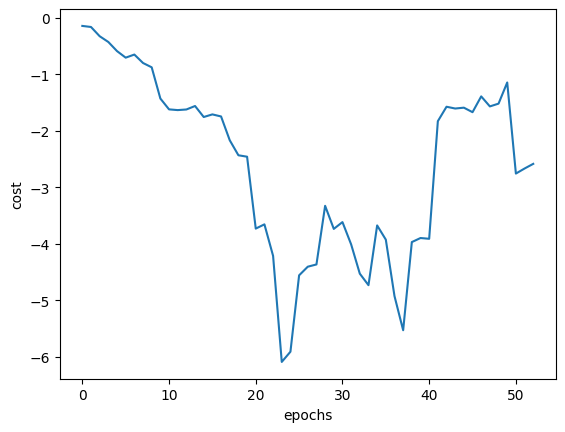

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random



# Let's start with reading the datasets
train_data = pd.read_csv("concrete/train.csv",header=None)
test_data = pd.read_csv("concrete/test.csv",header=None)

# Training the datasets
X = train_data.iloc[:,:-1]
Y = train_data.iloc[:,-1]
X_train = np.column_stack(([1]*X.shape[0], X))
m,n = X_train.shape
weights = np.array([0]*n)
X = np.array(X_train)
Y = np.array(Y)
r = 1
iterations = 1000
cost = []
weights_new = []


cost_at_step = []
def gradient(x,y,w,grad_dw):
    for i in range(len(x)):
        pred = np.dot(w.T,x)
        grad_dw[i] = -(y-pred)*x[i]
    return grad_dw
c=0
r = 0.026
while 1:
    dw = [0]*n
    for j in range(len(X)):
        dw = gradient(X[j],Y[j],weights,dw)
        weights_new = weights - r * np.array(dw)
        weights = weights_new
        cost_at_step.append((1/2)*sum(Y - np.matmul(weights,X.T)**2))
    if np.count_nonzero(abs(weights_new - weights)<10**-6):
        c=1
        break

def lms(true,pred):
    return (1/len(true))*sum((true-pred)**2)
pred = np.matmul(X,weights)
print("train error : ",lms(Y,pred))

# Testing the data
X_t = test_data.iloc[:,:-1]
Y_t = test_data.iloc[:,-1]
X_test = np.column_stack(([1]*X_t.shape[0], X_t))

#Finally printing the result
pred = np.matmul(X_test,weights)
print("test error : ",lms(Y_t,pred))
print("For the learning rate {} the learned weight vector is {} and the bias is {}".format(r,weights,weights[0]))

# Plotting graph for better visualization.
plt.plot(range(len(cost_at_step)),cost_at_step)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()